In [1]:
!pip install sklearn

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score , cross_validate

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

pima_df = pd.read_csv('./pima-indians-diabetes.csv')
pima_df.head(3)

,pregnant,glucose,pressure,thickness,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


# 1. Number of times pregnant
-> 임신 횟수
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
-> 포도당 내당검사
# 3. Diastolic blood pressure (mm Hg)
-> 혈압
# 4. Triceps skin fold thickness (mm)
-> 삼두 피하지방 두께
# 5. 2-Hour serum insulin (mu U/ml)
-> 혈청 인슐린 수치
# 6. Body mass index (weight in kg/(height in m)^2)
-> BMI
# 7. Diabetes pedigree function
-> (a function that represents how likely they are to get the disease by extrapolating from their ancestor’s history
# 8. Age (years)
# 9. Class variable (0 or 1)
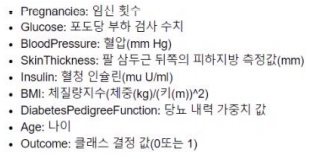

1. 데이터 분석

In [11]:
print('\n ### train 데이터 정보 ###  \n')
print(pima_df.info())
print('데이터 세트 Null 값 갯수 ',pima_df.isnull().sum().sum())
print(pima_df['label'].value_counts())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glucose    768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   label      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
데이터 세트 Null 값 갯수  0
0    500
1    268
Name: label, dtype: int64


전처리 안하고 학습

In [12]:
x = pima_df.iloc[:,:-1]
y = pima_df.iloc[:,-1]

train_X, test_X, train_Y, test_Y = train_test_split(x,y, test_size = 0.2, random_state = 156, stratify=y)

In [53]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , f1_score , roc_auc_score , confusion_matrix

def get_clf_eval(y_test, pred,pred_proba):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, f1: {3:.4f}, AUC: {4:.4f}'.format(accuracy , precision , recall , f1 , roc_auc))

    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dt_clf = DecisionTreeClassifier(random_state=156)
rf_clf = RandomForestClassifier(random_state=156)
lr_clf = LogisticRegression()

dt_clf.fit(train_X,train_Y)
rf_clf.fit(train_X,train_Y)
lr_clf.fit(train_X,train_Y)

pred_dt = dt_clf.predict(test_X)
pred_rf = rf_clf.predict(test_X)
pred_lr = lr_clf.predict(test_X)

c:\users\ad\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
pred_proba_dt = dt_clf.predict_proba(test_X)[:, 1]

In [56]:
pred_proba_rf = rf_clf.predict_proba(test_X)[:, 1]

In [58]:
pred_proba_lr = lr_clf.predict_proba(test_X)[:, 1]

In [59]:
get_clf_eval(test_Y,pred_dt, pred_proba_dt)

오차 행렬
[[75 25]
 [23 31]]
정확도: 0.6883, 정밀도: 0.5536, 재현율: 0.5741, f1: 0.5636, AUC: 0.6620


In [60]:
get_clf_eval(test_Y,pred_rf, pred_proba_rf)

오차 행렬
[[84 16]
 [19 35]]
정확도: 0.7727, 정밀도: 0.6863, 재현율: 0.6481, f1: 0.6667, AUC: 0.8203


In [61]:
get_clf_eval(test_Y,pred_lr, pred_proba_lr)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, f1: 0.6392, AUC: 0.7919


2. 데이터 전처리

In [62]:
pima_df.describe()

,pregnant,glucose,pressure,thickness,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

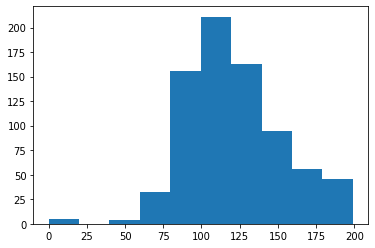

In [63]:
plt.hist(pima_df['glucose'], bins=10)

1차 정규화

In [65]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['glucose', 'pressure','thickness','insulin','bmi']

# 전체 데이터 건수
total_count = pima_df['glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = pima_df[pima_df[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))


glucose 0 건수는 5, 퍼센트는 0.65 %
pressure 0 건수는 35, 퍼센트는 4.56 %
thickness 0 건수는 227, 퍼센트는 29.56 %
insulin 0 건수는 374, 퍼센트는 48.70 %
bmi 0 건수는 11, 퍼센트는 1.43 %


In [67]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
pima_df[zero_features]=pima_df[zero_features].replace(0, pima_df[zero_features].mean())

Standard Scaler

In [77]:
from sklearn.preprocessing import StandardScaler

x = pima_df.iloc[:,:-1]
y = pima_df.iloc[:,-1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
x_scaled = scaler.fit_transform(x)

train_X, test_X, train_Y, test_Y = train_test_split(x_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dt_clf = DecisionTreeClassifier(random_state=156)
rf_clf = RandomForestClassifier(random_state=156)
lr_clf = LogisticRegression()

dt_clf.fit(train_X,train_Y)
rf_clf.fit(train_X,train_Y)
lr_clf.fit(train_X,train_Y)

pred_dt = dt_clf.predict(test_X)
pred_rf = rf_clf.predict(test_X)
pred_lr = lr_clf.predict(test_X)

In [79]:
pred_proba_dt = dt_clf.predict_proba(test_X)[:, 1]

In [80]:
pred_proba_rf = rf_clf.predict_proba(test_X)[:, 1]

In [81]:
pred_proba_lr = lr_clf.predict_proba(test_X)[:, 1]

In [82]:
get_clf_eval(test_Y,pred_dt, pred_proba_dt)

오차 행렬
[[80 20]
 [26 28]]
정확도: 0.7013, 정밀도: 0.5833, 재현율: 0.5185, f1: 0.5490, AUC: 0.6593


In [83]:
get_clf_eval(test_Y,pred_rf, pred_proba_rf)

오차 행렬
[[83 17]
 [21 33]]
정확도: 0.7532, 정밀도: 0.6600, 재현율: 0.6111, f1: 0.6346, AUC: 0.8207


In [84]:
get_clf_eval(test_Y,pred_lr, pred_proba_lr)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, f1: 0.6804, AUC: 0.8433


MINMAX

In [85]:
from sklearn.preprocessing import MinMaxScaler

x = pima_df.iloc[:,:-1]
y = pima_df.iloc[:,-1]

# Min_MAX
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

train_X, test_X, train_Y, test_Y = train_test_split(x_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

dt_clf = DecisionTreeClassifier(random_state=156)
rf_clf = RandomForestClassifier(random_state=156)
lr_clf = LogisticRegression()

dt_clf.fit(train_X,train_Y)
rf_clf.fit(train_X,train_Y)
lr_clf.fit(train_X,train_Y)

pred_dt = dt_clf.predict(test_X)
pred_rf = rf_clf.predict(test_X)
pred_lr = lr_clf.predict(test_X)

In [87]:
pred_proba_dt = dt_clf.predict_proba(test_X)[:, 1]

In [88]:
pred_proba_rf = rf_clf.predict_proba(test_X)[:, 1]

In [89]:
pred_proba_lr = lr_clf.predict_proba(test_X)[:, 1]

In [90]:
get_clf_eval(test_Y,pred_dt, pred_proba_dt)

오차 행렬
[[79 21]
 [27 27]]
정확도: 0.6883, 정밀도: 0.5625, 재현율: 0.5000, f1: 0.5294, AUC: 0.6450


In [91]:
get_clf_eval(test_Y,pred_rf, pred_proba_rf)

오차 행렬
[[84 16]
 [22 32]]
정확도: 0.7532, 정밀도: 0.6667, 재현율: 0.5926, f1: 0.6275, AUC: 0.8189


In [92]:
get_clf_eval(test_Y,pred_lr, pred_proba_lr)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, f1: 0.6804, AUC: 0.8487


3. 모델 & 학습 및 평가
-> 1. DecisionTreeClassifier <br>
-> 2. RandomForestClassifier <br>
-> 3. LogisticRegression

In [93]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [96]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba_dt = dt_clf.predict_proba(test_X)
get_eval_by_threshold(test_Y, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[63 37]
 [ 8 46]]
정확도: 0.7078, 정밀도: 0.5542, 재현율: 0.8519, f1: 0.6715, AUC: 0.8487
임곗값: 0.33
오차 행렬
[[71 29]
 [11 43]]
정확도: 0.7403, 정밀도: 0.5972, 재현율: 0.7963, f1: 0.6825, AUC: 0.8487
임곗값: 0.36
오차 행렬
[[77 23]
 [13 41]]
정확도: 0.7662, 정밀도: 0.6406, 재현율: 0.7593, f1: 0.6949, AUC: 0.8487
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, f1: 0.6667, AUC: 0.8487
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, f1: 0.6792, AUC: 0.8487
임곗값: 0.45
오차 행렬
[[87 13]
 [20 34]]
정확도: 0.7857, 정밀도: 0.7234, 재현율: 0.6296, f1: 0.6733, AUC: 0.8487
임곗값: 0.48
오차 행렬
[[89 11]
 [21 33]]
정확도: 0.7922, 정밀도: 0.7500, 재현율: 0.6111, f1: 0.6735, AUC: 0.8487
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, f1: 0.6804, AUC: 0.8487


In [97]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba_rf = rf_clf.predict_proba(test_X)
get_eval_by_threshold(test_Y, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[63 37]
 [ 8 46]]
정확도: 0.7078, 정밀도: 0.5542, 재현율: 0.8519, f1: 0.6715, AUC: 0.8487
임곗값: 0.33
오차 행렬
[[71 29]
 [11 43]]
정확도: 0.7403, 정밀도: 0.5972, 재현율: 0.7963, f1: 0.6825, AUC: 0.8487
임곗값: 0.36
오차 행렬
[[77 23]
 [13 41]]
정확도: 0.7662, 정밀도: 0.6406, 재현율: 0.7593, f1: 0.6949, AUC: 0.8487
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, f1: 0.6667, AUC: 0.8487
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, f1: 0.6792, AUC: 0.8487
임곗값: 0.45
오차 행렬
[[87 13]
 [20 34]]
정확도: 0.7857, 정밀도: 0.7234, 재현율: 0.6296, f1: 0.6733, AUC: 0.8487
임곗값: 0.48
오차 행렬
[[89 11]
 [21 33]]
정확도: 0.7922, 정밀도: 0.7500, 재현율: 0.6111, f1: 0.6735, AUC: 0.8487
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, f1: 0.6804, AUC: 0.8487


In [98]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba_lr = lr_clf.predict_proba(test_X)
get_eval_by_threshold(test_Y, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[63 37]
 [ 8 46]]
정확도: 0.7078, 정밀도: 0.5542, 재현율: 0.8519, f1: 0.6715, AUC: 0.8487
임곗값: 0.33
오차 행렬
[[71 29]
 [11 43]]
정확도: 0.7403, 정밀도: 0.5972, 재현율: 0.7963, f1: 0.6825, AUC: 0.8487
임곗값: 0.36
오차 행렬
[[77 23]
 [13 41]]
정확도: 0.7662, 정밀도: 0.6406, 재현율: 0.7593, f1: 0.6949, AUC: 0.8487
임곗값: 0.39
오차 행렬
[[78 22]
 [16 38]]
정확도: 0.7532, 정밀도: 0.6333, 재현율: 0.7037, f1: 0.6667, AUC: 0.8487
임곗값: 0.42
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667, f1: 0.6792, AUC: 0.8487
임곗값: 0.45
오차 행렬
[[87 13]
 [20 34]]
정확도: 0.7857, 정밀도: 0.7234, 재현율: 0.6296, f1: 0.6733, AUC: 0.8487
임곗값: 0.48
오차 행렬
[[89 11]
 [21 33]]
정확도: 0.7922, 정밀도: 0.7500, 재현율: 0.6111, f1: 0.6735, AUC: 0.8487
임곗값: 0.5
오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111, f1: 0.6804, AUC: 0.8487


In [100]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(test_Y , pred_th_048, pred_proba[:, 1])



오차 행렬
[[89 11]
 [21 33]]
정확도: 0.7922, 정밀도: 0.7500, 재현율: 0.6111, f1: 0.6735, AUC: 0.8487


======================================

K-FOLD

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
    
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 
exec_kfold(rf_clf , folds=5) 
exec_kfold(lr_clf , folds=5) 
